Do DLBC tumor samples cluster or show structure based on gene expression profiles?

In [1]:
# Load normalized data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

log_cpm = pd.read_parquet("../data/dlbc_log_cpm.parquet")
log_cpm.shape

(23920, 48)

In [2]:
# PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = log_cpm.T  # samples × genes
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=10)
pcs = pca.fit_transform(X_scaled)

pca.explained_variance_ratio_[:5]

array([0.21320065, 0.07179772, 0.06302417, 0.04386537, 0.03707711])

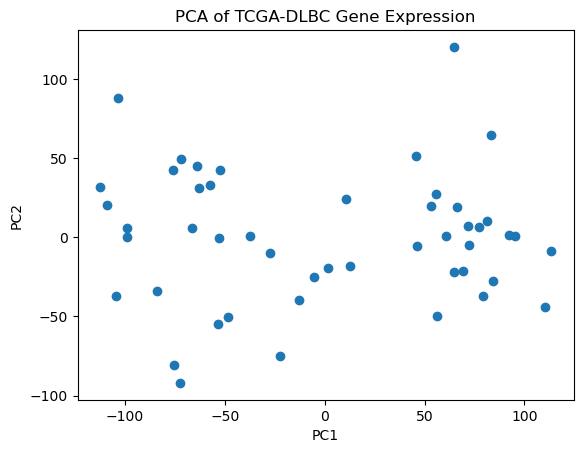

In [4]:
# Visualize

plt.figure()
plt.scatter(pcs[:, 0], pcs[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of TCGA-DLBC Gene Expression")
plt.show()

# Principal Component Analysis (PCA) was applied to the log₂(CPM + 1)
# normalized gene expression matrix to explore structure among TCGA-DLBC tumor samples. 
# Prior to PCA, expression values were standardized across genes to ensure that highly variable 
# genes did not dominate the analysis. The first principal component (PC1) explained approximately 
# 21% of the total variance, while the second principal component (PC2) explained approximately 7%. 
# Although no single component captured a majority of the variance, 
# this pattern is expected for high-dimensional gene expression data. 
# A scatter plot of PC1 versus PC2 revealed substantial spread among samples, 
# with evidence of separation along PC1 and additional variation along PC2. 
# While samples did not form sharply defined clusters, the observed structure suggests systematic differences 
# in gene expression profiles across DLBC tumors. These results indicate that gene expression contains meaningful
# variation that may be useful for downstream predictive or inferential analyses.

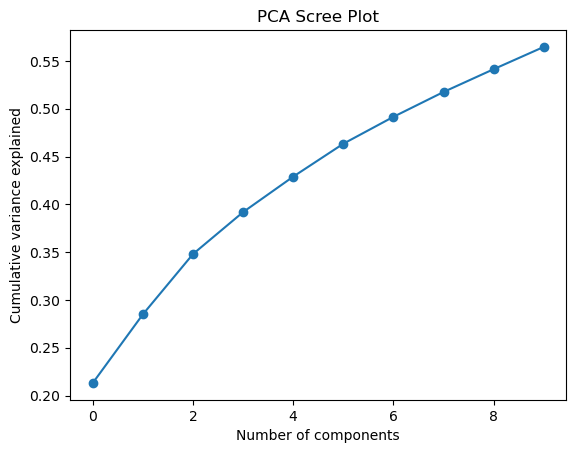

In [5]:
# scree plot

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.xlabel("Number of components")
plt.ylabel("Cumulative variance explained")
plt.title("PCA Scree Plot")
plt.show()

# The scree plot displays the cumulative proportion of variance explained as additional principal 
# components are included in the PCA. The first principal component explains approximately 21% of the total 
# variance, and the first two components together explain just under 30%. 
# This indicates that a substantial amount of the overall variation in gene expression is captured by only a 
# small number of components. As more components are added, the cumulative variance increases more gradually: 
# by about five components, roughly 45–46% of the variance is explained, and by ten components, just over 55% is
# explained. The shape of the scree plot shows a clear diminishing return after the first few components, 
# with no sharp elbow but a noticeable flattening of the curve. 
# This pattern is typical for high-dimensional RNA-seq data, where biological variation is spread across many 
# genes rather than concentrated in a small number of dominant directions. 
# The results suggest that while no single component captures a majority of the variance, 
# the early principal components summarize the most prominent shared structure in the data. 
# For exploratory purposes, focusing on the first several components provides a meaningful low-dimensional 
# representation of the gene expression profiles without substantial loss of information.

In [6]:
# k-Means on PCs

X_pcs = pcs[:, :5]  # first 5 principal components

from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=2, random_state=2025)
labels_k2 = kmeans2.fit_predict(X_pcs)

kmeans3 = KMeans(n_clusters=3, random_state=2025)
labels_k3 = kmeans3.fit_predict(X_pcs)

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1413: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1413: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


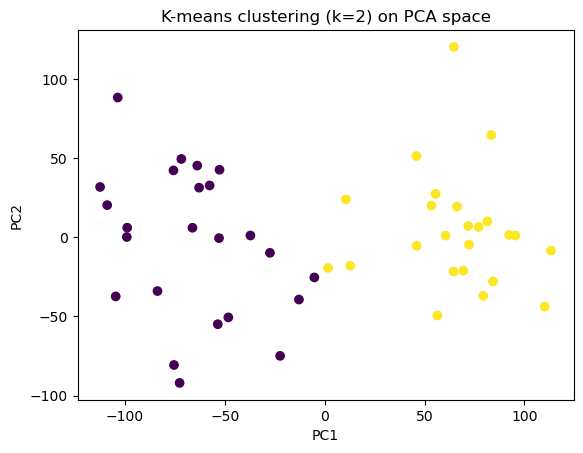

In [7]:
# visualize clusters on the PCA plot

#k = 2

plt.figure()
plt.scatter(pcs[:, 0], pcs[:, 1], c=labels_k2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means clustering (k=2) on PCA space")
plt.show()

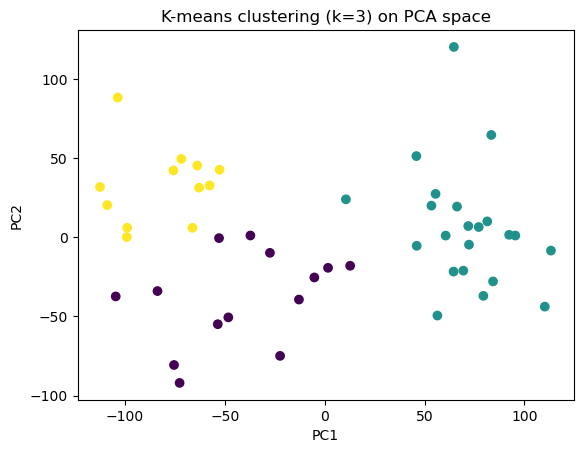

In [8]:
# k = 3

plt.figure()
plt.scatter(pcs[:, 0], pcs[:, 1], c=labels_k3)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means clustering (k=3) on PCA space")
plt.show()


In [11]:
# compare cluster sizes

np.bincount(labels_k2), np.bincount(labels_k3)

# K-means Clustering Results

# To further explore structure in the TCGA-DLBC gene expression data, k-means clustering was applied 
# to the first five principal components obtained from the PCA. Clustering was performed in this 
# reduced-dimensional space to focus on the dominant sources of variation while reducing noise from the 
# high-dimensional gene expression matrix.

#When using two clusters (k = 2), the samples split evenly into two groups of 24 samples each. 
# The resulting clusters show a clear separation primarily along the first principal component (PC1), 
# with one cluster concentrated at negative PC1 values and the other at positive PC1 values. 
# This suggests that PC1 captures a major axis of variation in gene expression that broadly divides the 
# DLBC tumors into two groups with distinct expression profiles.

# When the number of clusters was increased to three (k = 3), the samples were divided into clusters of 
# sizes 14, 22, and 12. In this case, the rightmost cluster along PC1 remains relatively well defined, while 
# the samples with negative PC1 values are further subdivided into two groups that differ primarily along PC2. 
# This indicates that additional, more subtle structure is present in the data beyond the dominant separation 
# captured by PC1, although the boundaries between some clusters are less distinct.

# Overall, the clustering results are consistent with the PCA findings. 
# The k = 2 solution highlights a strong global separation in gene expression profiles, 
# while the k = 3 solution reveals finer-scale heterogeneity among tumors. These patterns suggest that 
# DLBC tumors exhibit structured but continuous variation in gene expression rather than sharply defined 
# subtypes. As an exploratory analysis, these clusters are interpreted as hypothesis-generating and motivate 
# subsequent predictive and inferential analyses rather than representing definitive biological classifications.

# Because clustering was performed without clinical labels, the observed groupings reflect intrinsic 
# expression patterns rather than known biological subtypes.

(array([24, 24]), array([14, 22, 12]))